### 2 Plotting pairwise relationships with PairGrid and pairplot()
- 区分：区别FacetGrid and a PairGrid是很重要的。前者显示的是变量在不同水平上的相互关系；后者显示的是不同变量间的关系。
> - It’s important to understand the differences between a FacetGrid and a PairGrid. 
> - In the former, each facet shows the same relationship conditioned on different levels of other variables. 
> - In the latter, each plot shows a different relationship (although the upper and lower triangles will have mirrored plots).

- 用法：先初始化grid，然后传递绘图函数到map方法中。
> - The basic usage of the class is very similar to FacetGrid. 
> - First you initialize the grid, then you pass plotting function to a map method and it will be called on each subplot. 
> - There is also a companion function, pairplot() that trades off some flexibility for faster plotting.

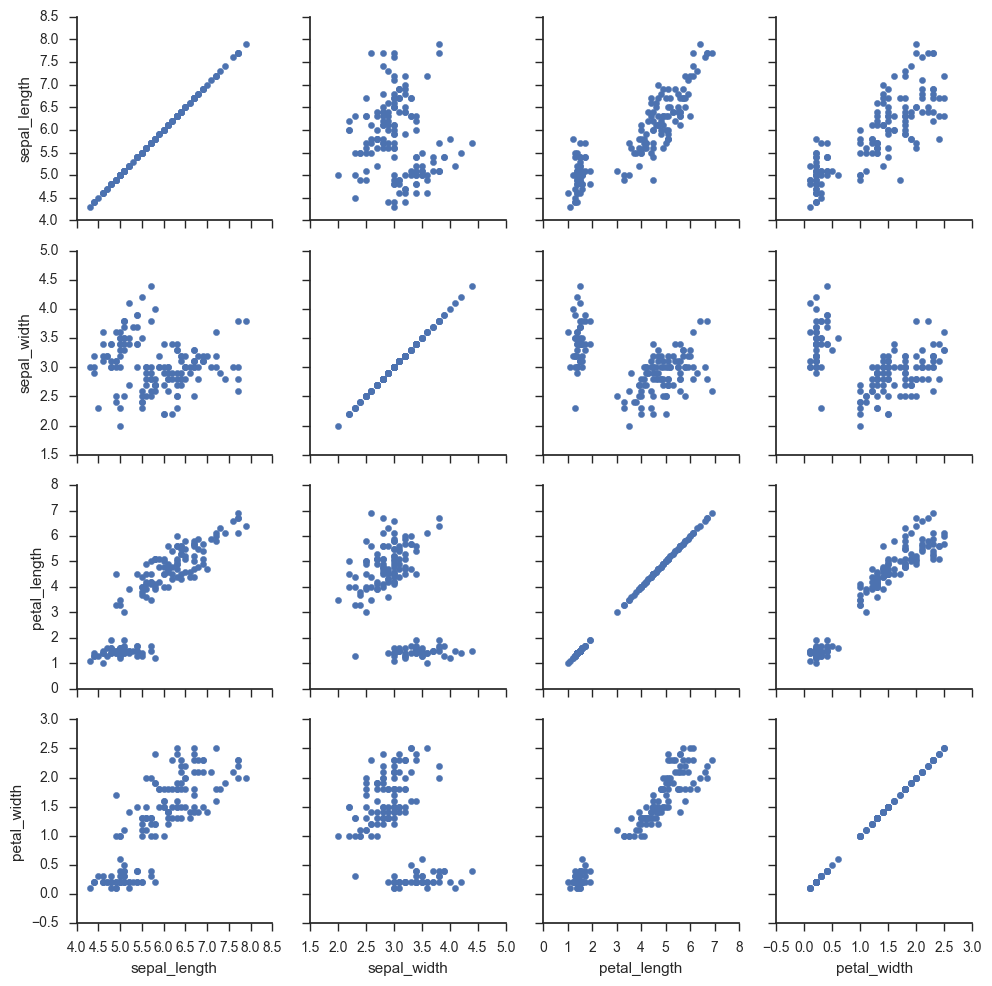

In [20]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter);

- 可以在对角线上显示不同的绘图函数。
> - It’s possible to plot a different function on the diagonal to show the univariate distribution of the variable in each column. 
> - Note that the axis ticks won’t correspond to the count or density axis of this plot, though.

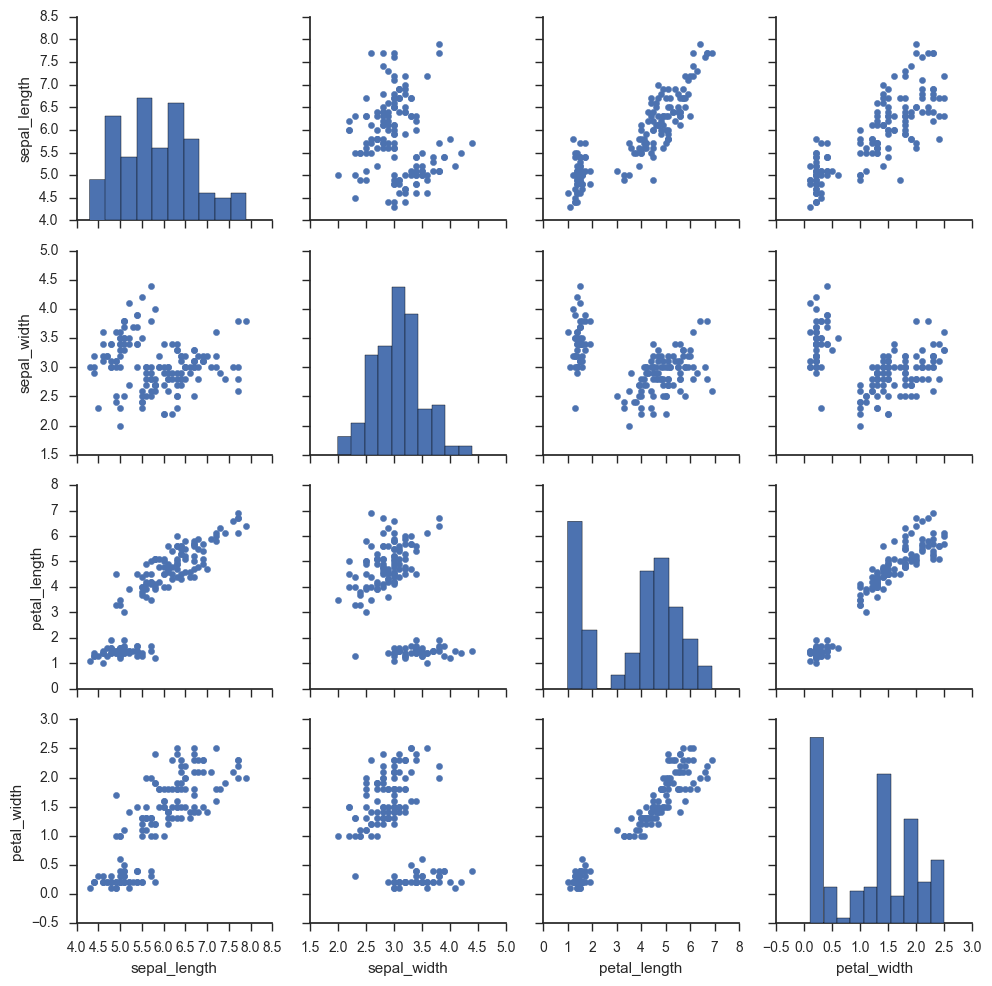

In [21]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

- 不同类别可以使用不同颜色
> - A very common way to use this plot colors the observations by a separate categorical variable. 
> - For example, the iris dataset has four measurements for each of three different species of iris flowers so you can see how they differ.

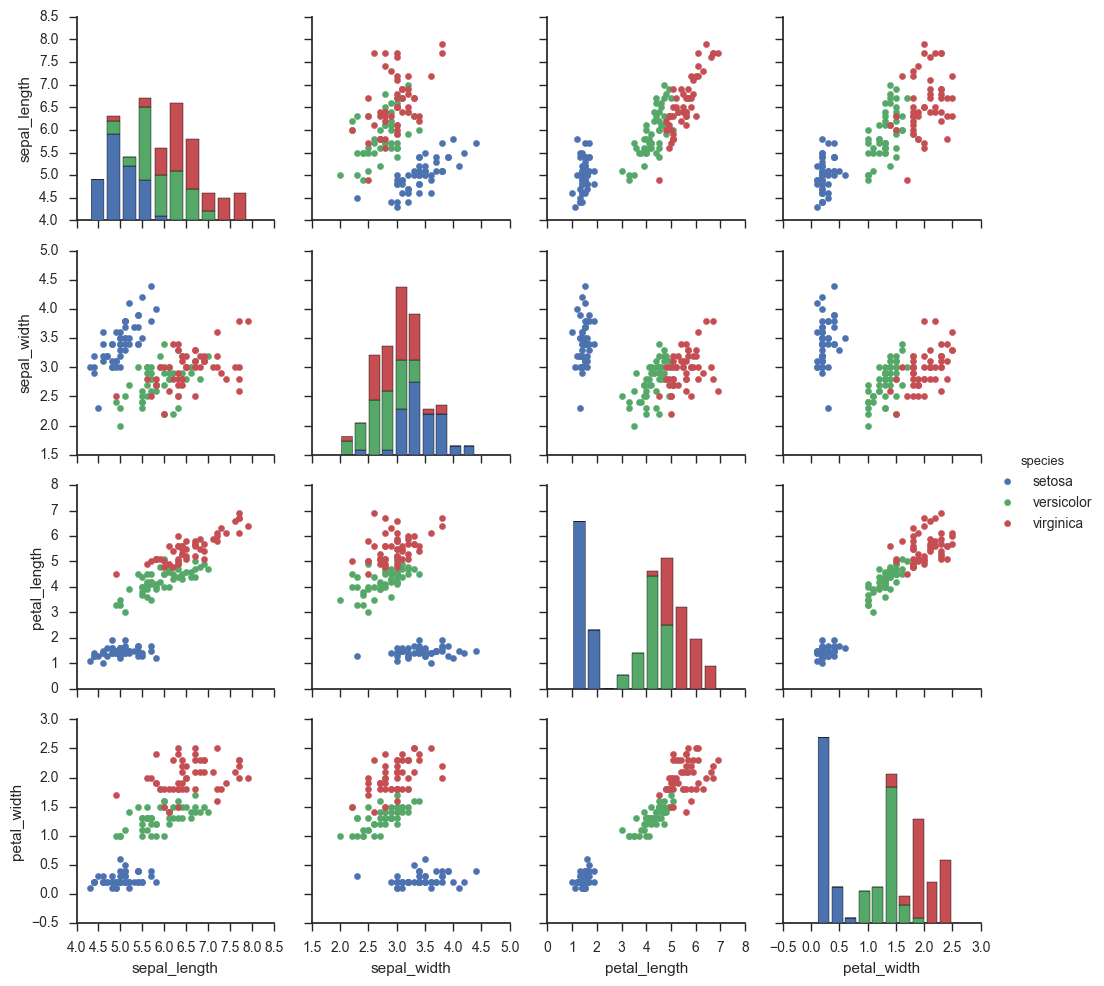

In [22]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

- 可以集中看某对关系，默认全部画出
> - By default every numeric column in the dataset is used, but you can focus on particular relationships if you want.

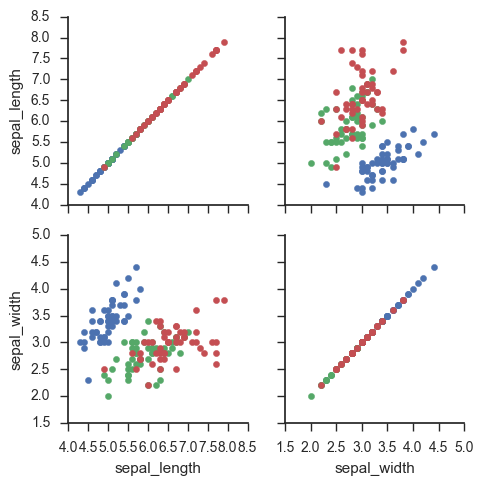

In [23]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter);

- 可以改变对角线上方或下方的绘图函数
> - It’s also possible to use a different function in the upper and lower triangles to emphasize different aspects of the relationship.

D:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


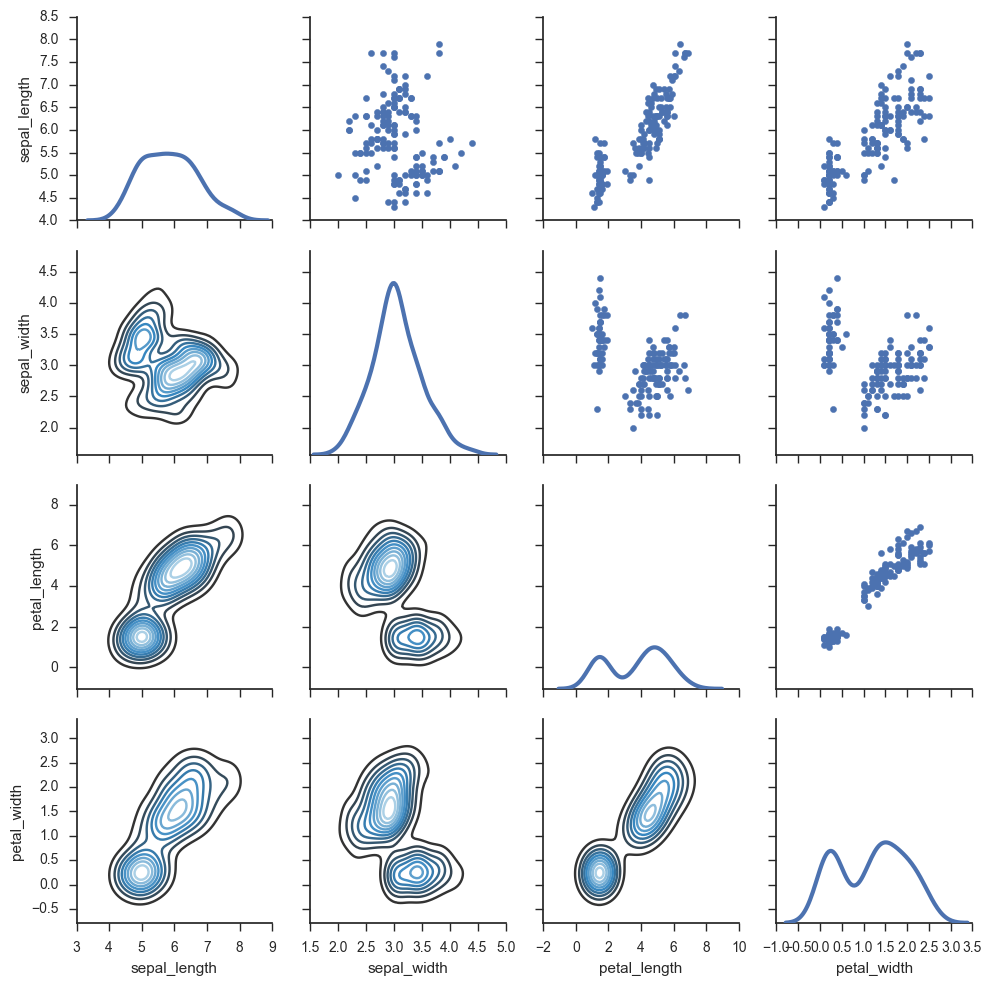

In [24]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False);

- 方网格中对角线上的一致关系是特例，可以在行列上使用不同的变量
> - The square grid with identity relationships on the diagonal is actually just a special case, and you can plot with different variables in the rows and columns.

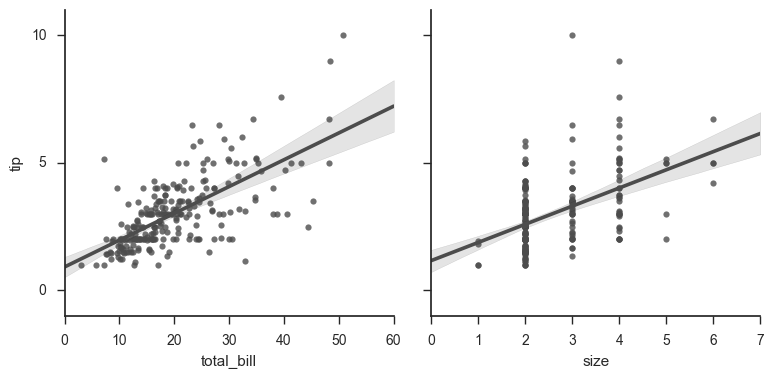

In [25]:
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], size=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);

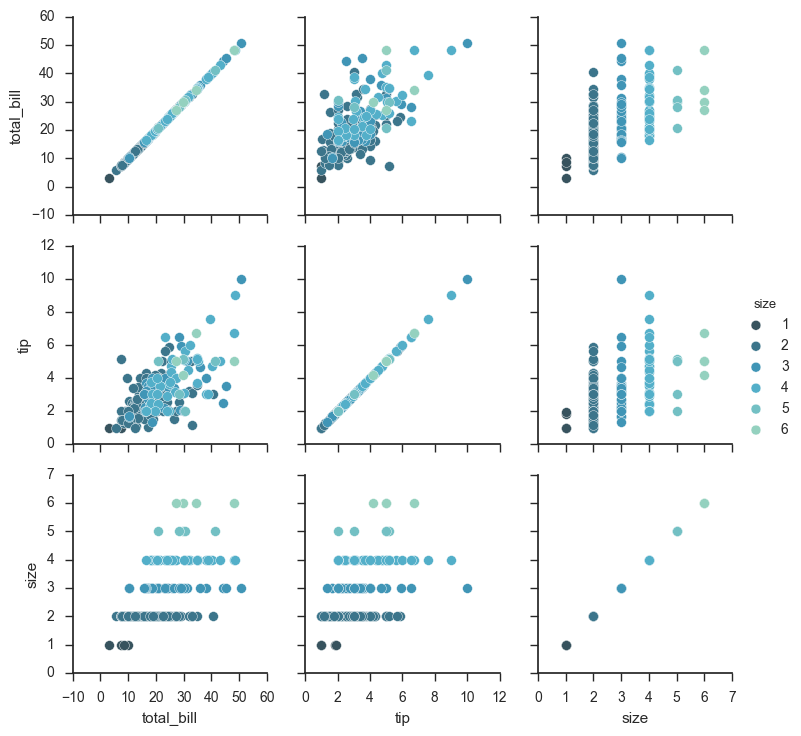

In [26]:
# use a different palette (say, to show an ordering of the hue variable) and 
# pass keyword arguments into the plotting functions.
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

- PairGrid十分灵活，但是如果要快速浏览数据，使用pairplot()更简单。这个函数默认使用散点图和直方图，但是也可以画回归线和KDE。
> - PairGrid is flexible, but to take a quick look at a dataset, it can be easier to use pairplot(). 
> - This function uses scatterplots and histograms by default, although a few other kinds will be added (currently, you can also plot regression plots on the off-diagonals and KDEs on the diagonal).

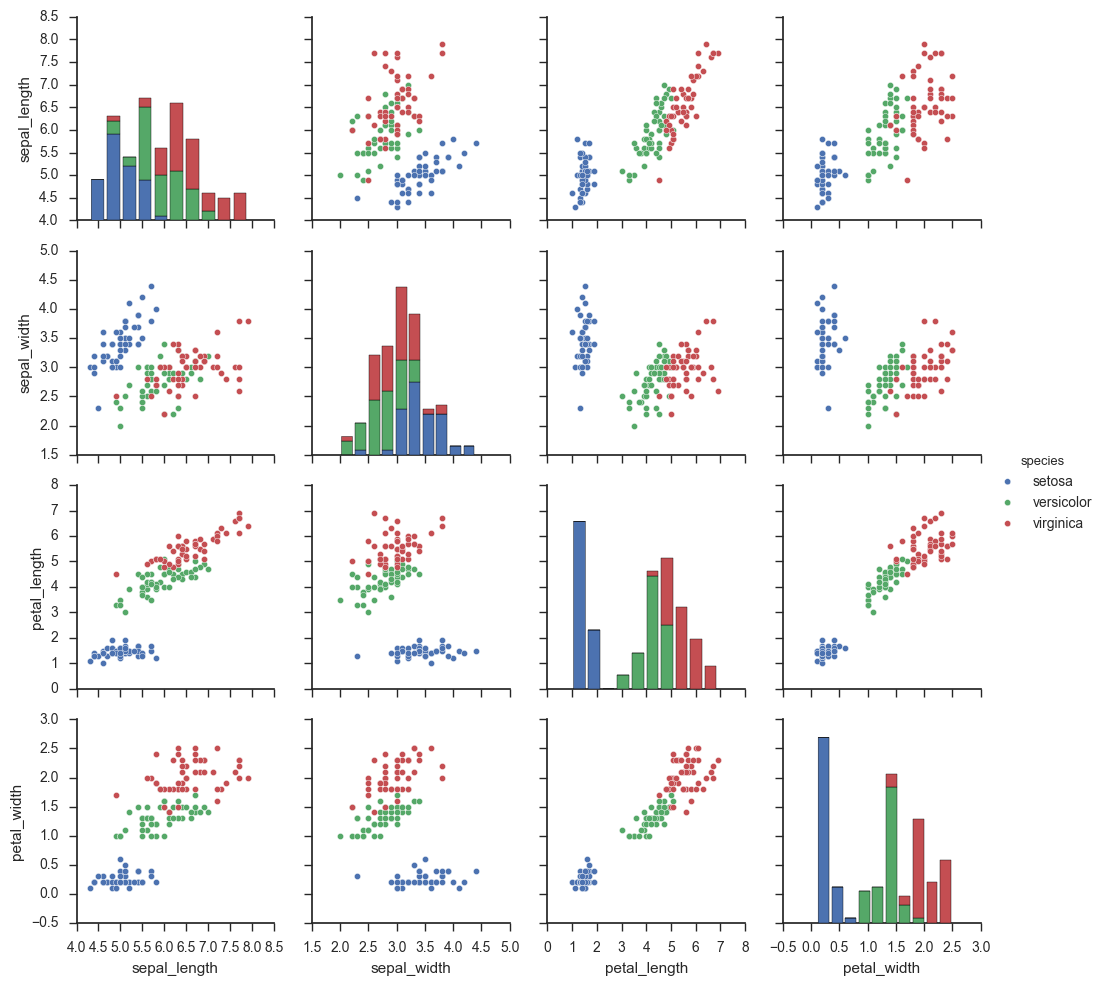

In [27]:
sns.pairplot(iris, hue="species", size=2.5);

D:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


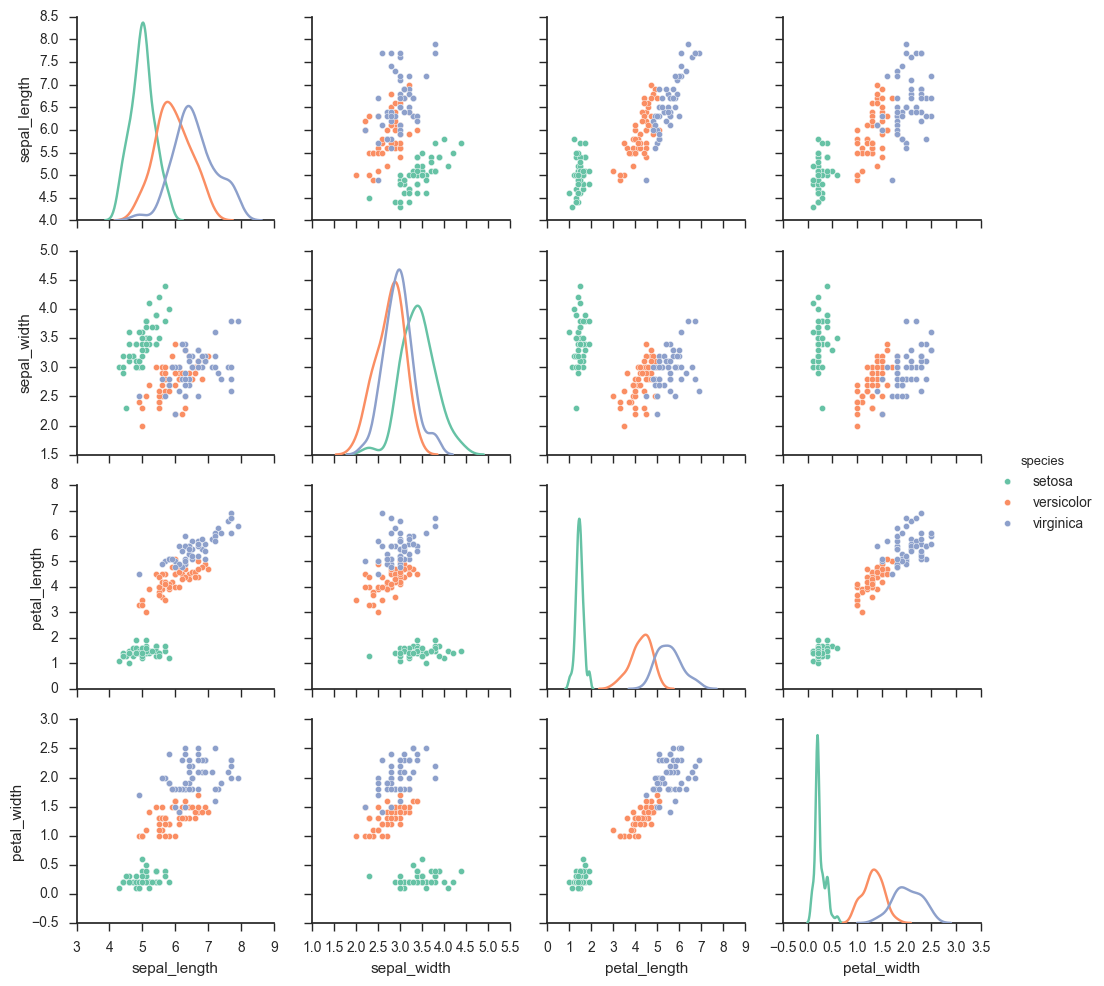

In [28]:
# it returns the PairGrid instance for further tweaking.
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", size=2.5)